In [1]:
from modules.general.F_search import *
from modules.graph.hist1D import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import h5py

In [2]:
INPUT = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon_all/DarkSUSY_all_NMuon_USER.h5'
hf = h5py.File(INPUT, 'r')

def find_Mu_Entries(vector, variable="Mu_Entries", file=hf):
    name_local_group = "MNeuL_" + str(vector[0]) + "/MNeuD_" + str(vector[1]) + \
                       "/MPhoD_" + str(vector[2]) + "/TcPhoD_" + str(vector[3]) + \
                       "/" + vector[4]
    # print(name_local_group)
    try:
        output = np.array(file.get(name_local_group + "/" + variable))
    except:
        output = None
    return output

def frec(data, number, porciento=.1, repetir=100):
    output = np.zeros(repetir)
    Nl = len(data)
    for i in range(repetir):
        if porciento <1:
            corte2, corte = train_test_split(data, test_size =porciento, shuffle = True)
        else:
            corte = data
        # print(len(corte), len(corte2))
        output[i] = float(np.sum(corte==number))/len(corte)
    #print(len(corte))
        # print(output[i], corte==number)
    return output

# graficar histograma especifico para este caso
def graficar_HISTG_ENTRIES(ax, vector, color="red"):
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")

    ax.hist(frec(Mu_Entries, 0, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="0 Sin muones")
    ax.hist(frec(Mu_Entries, 1, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="1 muones")
    ax.hist(frec(Mu_Entries, 2, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="2 muones")
    ax.hist(frec(Mu_Entries, 3, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="3 muones")
    ax.hist(frec(Mu_Entries, 4, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="4 muones")
    ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 1, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 2, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 3, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 4, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
    # ax.set_xlabel(" Porcentaje de Eventos")
    ax.set_ylabel(" Frecuencia Normalizada $f_N$")
    # ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
    #              "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
    #              ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
    ax.grid(True)
    return ax

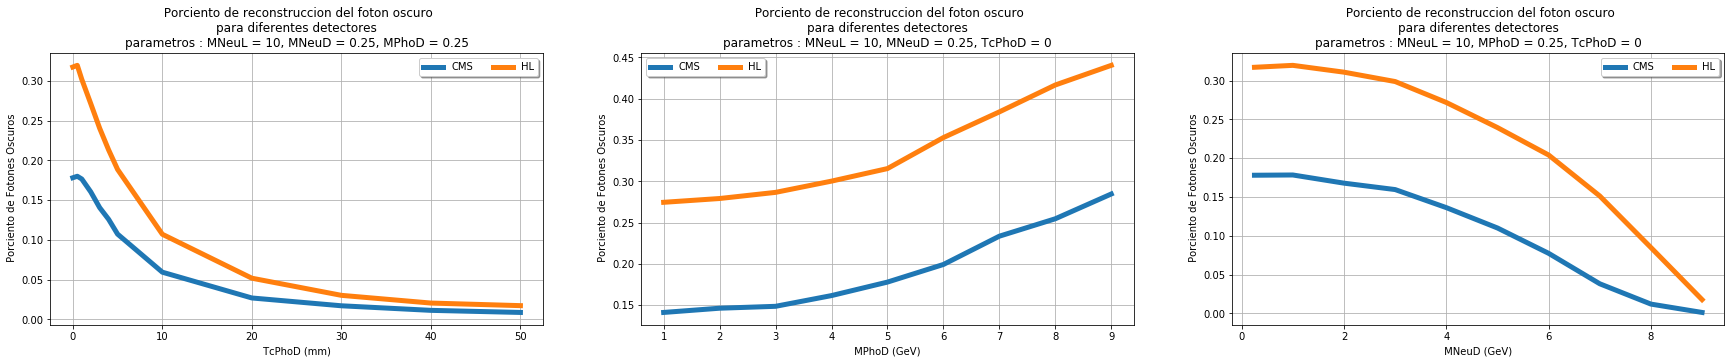

In [26]:
color0="blue"
color1="orange"
color2="limegreen"
color3="red"
color4="purple"

mmHL=5
mmCMS=5

plt.rcParams['figure.figsize'] = [30, 5]
fig = plt.figure()

X_TcPhoD = [0, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
Y_Entries_CMS_TcPhoD = np.zeros((len(X_TcPhoD), 5))
Y_Entries_HL_TcPhoD = np.zeros((len(X_TcPhoD), 5))
for iTcPhoD in range(len(X_TcPhoD)):
    vector = [10, 0.25, 0.25, X_TcPhoD[iTcPhoD], "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_CMS_TcPhoD[iTcPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                        frec(Mu_Entries, 1, 1, repetir=1)[0],
                                        frec(Mu_Entries, 2, 1, repetir=1)[0],
                                        frec(Mu_Entries, 3, 1, repetir=1)[0],
                                        frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, 0.25, 0.25, X_TcPhoD[iTcPhoD], "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_HL_TcPhoD[iTcPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                        frec(Mu_Entries, 1, 1, repetir=1)[0],
                                        frec(Mu_Entries, 2, 1, repetir=1)[0],
                                        frec(Mu_Entries, 3, 1, repetir=1)[0],
                                        frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(1, 3, 1)
Rec_Dark_Photon_CMS = Y_Entries_CMS_TcPhoD[:,4]+Y_Entries_CMS_TcPhoD[:,3]/2+Y_Entries_CMS_TcPhoD[:,2]/12
Rec_Dark_Photon_HL = Y_Entries_HL_TcPhoD[:,4]+Y_Entries_HL_TcPhoD[:,3]/2+Y_Entries_HL_TcPhoD[:,2]/12
ax.plot(X_TcPhoD, Rec_Dark_Photon_CMS, label="CMS", linewidth=mmCMS)
ax.plot(X_TcPhoD, Rec_Dark_Photon_HL, label="HL", linewidth=mmCMS)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_ylabel(" Porciento de Fotones Oscuros")
ax.set_xlabel(" TcPhoD (mm) ")
ax.set_title(" Porciento de reconstruccion del foton oscuro" + "\n" +
             "para diferentes detectores" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
             ", MPhoD = " + str(vector[2]))

## DATOS PARA LA SEGUNDA FILA ##
X_MPhoD = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Y_Entries_CMS_MPhoD = np.zeros((len(X_MPhoD), 5))
Y_Entries_HL_MPhoD = np.zeros((len(X_MPhoD), 5))
for iMPhoD in range(len(X_MPhoD)):
    vector = [10, 0.25, X_MPhoD[iMPhoD], 0, "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_CMS_MPhoD[iMPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, 0.25, X_MPhoD[iMPhoD], 0, "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_HL_MPhoD[iMPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(1, 3, 2)
Rec_Dark_Photon_CMS = Y_Entries_CMS_MPhoD[:,4]+Y_Entries_CMS_MPhoD[:,3]/2+Y_Entries_CMS_MPhoD[:,2]/12
Rec_Dark_Photon_HL = Y_Entries_HL_MPhoD[:,4]+Y_Entries_HL_MPhoD[:,3]/2+Y_Entries_HL_MPhoD[:,2]/12
ax.plot(X_MPhoD, Rec_Dark_Photon_CMS, label="CMS", linewidth=mmCMS)
ax.plot(X_MPhoD, Rec_Dark_Photon_HL, label="HL", linewidth=mmCMS)
ax.grid(True)
ax.legend(loc='upper left', shadow=True, ncol=4)
ax.set_ylabel(" Porciento de Fotones Oscuros")
ax.set_xlabel(" MPhoD (GeV) ")
ax.set_title(" Porciento de reconstruccion del foton oscuro" + "\n" +
             "para diferentes detectores" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " +
             str(vector[1]) + ", TcPhoD = " + str(vector[3]))


## DATOS PARA LA TERCERO FILA ##
X_MNeuD = [0.25, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y_Entries_CMS_MNeuD = np.zeros((len(X_MNeuD), 5))
Y_Entries_HL_MNeuD = np.zeros((len(X_MNeuD), 5))
for iMNeuD in range(len(X_MNeuD)):
    vector = [10, X_MNeuD[iMNeuD],  0.25, 0, "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_CMS_MNeuD[iMNeuD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, X_MNeuD[iMNeuD],  0.25, 0, "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")
    Y_Entries_HL_MNeuD[iMNeuD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(1, 3, 3)
Rec_Dark_Photon_CMS = Y_Entries_CMS_MNeuD[:,4]+Y_Entries_CMS_MNeuD[:,3]/2+Y_Entries_CMS_MNeuD[:,2]/12
Rec_Dark_Photon_HL = Y_Entries_HL_MNeuD[:,4]+Y_Entries_HL_MNeuD[:,3]/2+Y_Entries_HL_MNeuD[:,2]/12
ax.plot(X_MNeuD, Rec_Dark_Photon_CMS, label="CMS", linewidth=mmCMS)
ax.plot(X_MNeuD, Rec_Dark_Photon_HL, label="HL", linewidth=mmCMS)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_ylabel(" Porciento de Fotones Oscuros")
ax.set_xlabel(" MNeuD (GeV) ")
ax.set_title(" Porciento de reconstruccion del foton oscuro" + "\n" +
             "para diferentes detectores" + "\n" +
             "parametros : MNeuL = " + str(vector[0]) + ", MPhoD = " + str(vector[2]) +
             ", TcPhoD = " + str(vector[3]))

fig.savefig("Prociento_fotones_oscuros.pdf")
fig.savefig("Prociento_fotones_oscuros.png")
plt.show()
